# csv 파일 로드.

In [84]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns





df = pd.read_csv('vgames2.csv', index_col = 0)
#df.drop('Unnamed: 0', axis=1,inplace=True) 
df


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


## 데이터 정제 (EDA)


year error cnt = 371
pop cnt = 16598
0.02


array([[<AxesSubplot:title={'center':'Year'}>]], dtype=object)

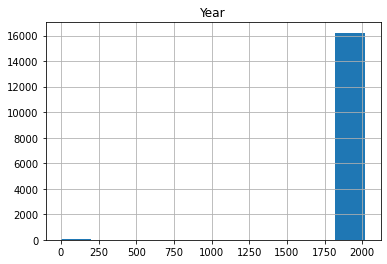

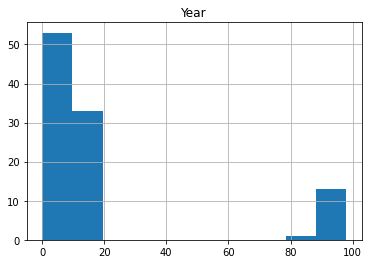

In [100]:
#df['Year'].describe()
df_year_error= df[ (df['Year'].isnull()) | (df['Year'] < 250)]

print( 'year error cnt =',df_year_error.shape[0])
print( 'pop cnt =',df.shape[0])

print( round( df_year_error.shape[0] / df.shape[0] ,2))

# 데이터를 살펴본 결과
# 연도가 Nan or 0인 결측치, 그리고 250 이하의 이상치 데이터가 
# 전체데이터의 0.02%라서 제거하기로 결정했습니다.

# histogram 으로 250이하의 값도 이상치라고 판단. 


  
# fig, ax = plt.subplots(figsize = (20,12))
# ax.grid(True)
# fig.set_facecolor('lightgrey')

df.hist( 'Year')
df_year_error.hist( 'Year') 
 

In [86]:

#장르나 퍼블리셔가 null 인 것들은. 
#같은 게임이름이 있다면 매칭시켜서 채워 넣을 수 있지 않을까?

#일단 mission 먼저 클리어 하고 나서 확인해보자.

#df[ df['Genre'].isnull() ]
#df_Pub_nan = df[ df['Publisher'].isnull() ]
#df_Pub_exist = df[ df['Publisher'].isnull()==False ]
# a = df['Name'] is Pub_null_name['Name']
#df_Pub_nan.head()
#df_Pub_exist.head()


# for i,v in enumerate(df_Pub_nan['Name'] ):
#     print(f'{i},{v}')
    # if v in df['Name']:
    #     print(f'{v}',df['Publisher'])
    
#df1.info()
#df1['Genre'].value_counts().sum()


In [87]:
df[df.duplicated()]
#중복값도 찾았으나 Year이 0이므로 결측치 제거할때 함께 제거.

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
9185,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0,0,0.02,0


In [155]:

df1 = df.copy()

# 데이터 제거.
del_con_byYear = df_year_error.index
df1.drop(del_con_byYear, inplace=True)


#장르고,퍼블리셔고 일단 nan 이면 제거. 
df1.dropna(inplace=True)
df1.reset_index(drop=True,inplace = True)
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16141 entries, 0 to 16140
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16141 non-null  object 
 1   Platform     16141 non-null  object 
 2   Year         16141 non-null  float64
 3   Genre        16141 non-null  object 
 4   Publisher    16141 non-null  object 
 5   NA_Sales     16141 non-null  object 
 6   EU_Sales     16141 non-null  object 
 7   JP_Sales     16141 non-null  object 
 8   Other_Sales  16141 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [156]:
# 숫자만 들어있어야 할 컬럼에 M,K라는 스트링이 존재
# 보통 100만을 M, 1000을 K로 대체해서 사용 함. 
# 숫자로 대체 하면 

sales = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales'] 

# 방법 1.
# 일단 삭제
def delete_MK():
    
    s1 = set([])
    for v in sales:
        idx = df1[ (df1[v].str.count('M')>0) | (df1[v].str.count('K')>0) ].index
        s1.update(idx)
    #print(s1)
    #print( 'total=', len(s1) / df1.shape[0] )

    df1.drop( s1, inplace=True)
    df1.reset_index(drop=True,inplace = True)




# 방법2.
# M, K데이터 들어있는 데이터 변환.
def convertMK(ss):

    if type(ss) == float :
        pass
    
    elif ss.count('M')>0:
        ss = float(ss.split('M')[0])#*1000000
    
    elif ss.count('K')>0:
        ss = float(ss.split('K')[0])#*1000
    
    return float(ss) 

def change_MK():
    for c in sales:
        res=[]
        for v in df1[c]:
            res.append(convertMK(v))

        df1.loc[ :, c] = res
        

#방법1 
delete_MK()
#방법2
#change_MK()

#숫자로 타입변경
df1[sales] = df1[sales].astype(float)
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15382 entries, 0 to 15381
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         15382 non-null  object 
 1   Platform     15382 non-null  object 
 2   Year         15382 non-null  float64
 3   Genre        15382 non-null  object 
 4   Publisher    15382 non-null  object 
 5   NA_Sales     15382 non-null  float64
 6   EU_Sales     15382 non-null  float64
 7   JP_Sales     15382 non-null  float64
 8   Other_Sales  15382 non-null  float64
dtypes: float64(5), object(4)
memory usage: 1.1+ MB


In [157]:
# na_sales M string이 붙은 feature를 찾는다. 
# split 하고 split 한 값[0]에 100만 을 곱해서 
# 다시 넣는다.

df1[sales].sum()
#df1['NA_Sales'].hist( )



NA_Sales       4055.22
EU_Sales       2251.70
JP_Sales       1192.14
Other_Sales     743.86
dtype: float64

In [193]:
#지역에 따라서 선호하는 게임 장르가 다를까?
#선호하는 게임은 많이 팔린 게임이라고 가정.
#지역별 많이 팔린 장르별 내림차순.

# - [x]  지역으로 그룹화
# - [x]  많이 팔린 게임 순 정렬
# - [x]  어느지역에서 어떤 장르가 많이 팔렸는지 시각화


# df1['Total_Sales'] = df1['NA_Sales'] + df1['EU_Sales'] + df1['JP_Sales'] + df1['Other_Sales']

# salesAll =[x for x in sales]
# salesAll.append('Total_Sales')
# salesAll


df_Genre = df1.groupby('Genre')[sales].sum()
df_Genre

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,801.89,486.60,149.85,176.14
Adventure,97.29,60.65,49.20,16.06
Fighting,210.51,94.18,82.58,34.33
Misc,380.36,200.14,99.47,69.97
Platform,410.96,184.11,121.88,47.88
Puzzle,118.40,49.95,56.16,12.13
Racing,334.14,222.66,50.60,73.48
Role-Playing,283.86,160.10,314.15,50.86
Shooter,544.63,293.38,36.53,96.68


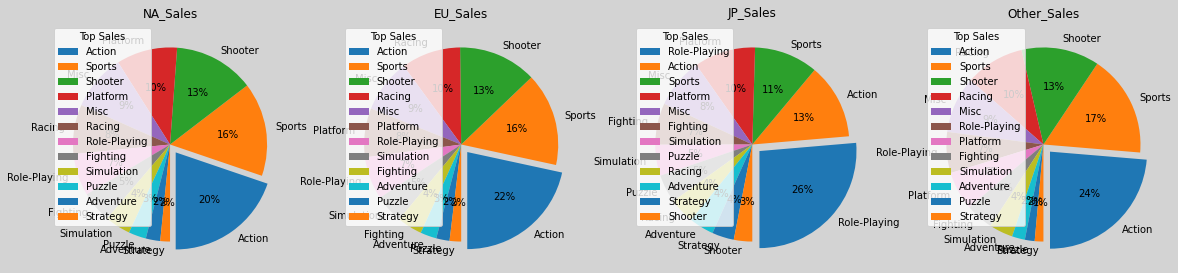

In [158]:
# ratio = df1['NA_Sales'].value_counts(normalize=True) # normalize는 비율을 나타내 주는 파라미터 
# ratio = round(ratio,2)
#print( ratio.max)
# ratio = df1['NA_Sales']
#ratio.hist( )
# print(ratio)

  
fig, ax = plt.subplots(figsize = (20,12))
ax.grid(True)
fig.set_facecolor('lightgrey')




for i,v in enumerate(sales):
    
    df_sorted = df_Genre.sort_values(by=v,ascending=False)[v]#.head(5)

    #Series 의 컬럼은 index
    mylabels = df_sorted.index
    # series 개수 만큼 넣어줘야함. index 순서. 가운데서 얼만큼 떨어트릴것인가?
    myExplode = [0 for _ in mylabels] 
    myExplode[0] = 0.1


    plt.subplot(1, 4, i+1)
    plt.pie( df_sorted , autopct='%.0f%%',labels = mylabels,explode = myExplode, startangle = 270)
    plt.title(v)
    plt.legend(title = "Top Sales",loc='upper left') 
    
plt.show();



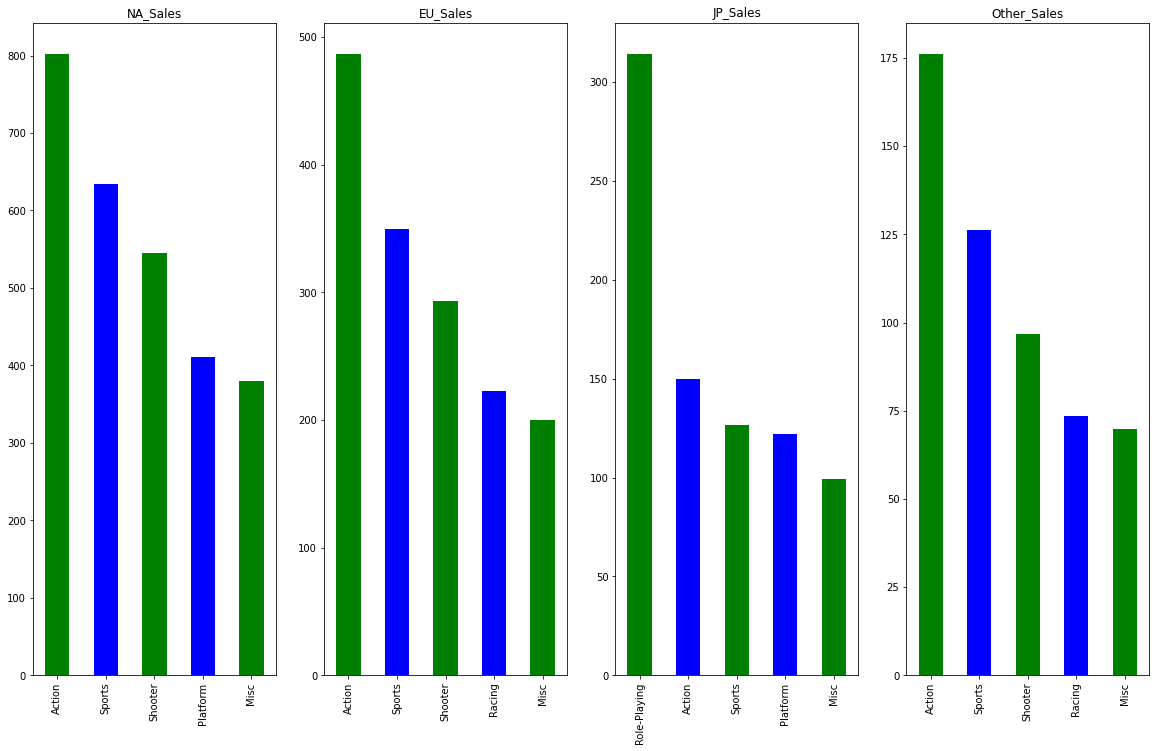

In [195]:

fig, ax = plt.subplots(figsize = (20,12))
for i,v in enumerate(sales):
    
    df_sorted = df_Genre.sort_values(by=v,ascending=False)[v].head(5)
    mylabels = df_sorted.index

    plt.subplot(1, 4, i+1)
    df_sorted.plot.bar( xlabel='', title=v, color=['g','b']);

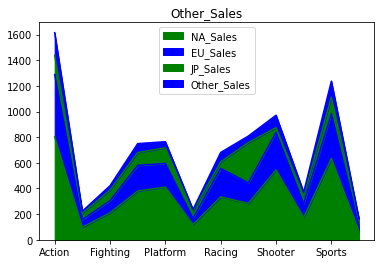

In [197]:
#df_Genre#.sort_values(by=v,ascending=False)[v]
df_Genre[sales].plot.area( xlabel='', title=v, color=['g','b']);

In [94]:
#df_genre['Total_Sales'] = 

# Name	Platform	Year	Genre	Publisher	NA_Sales	EU_Sales	JP_Sales	Other_Sales
# 9185	Wii de Asobu: Metroid Prime	Wii	NaN	Shooter	Nintendo	0	0	0.02	0


In [95]:
#연도별 게임의 트렌드가 있을까 ? 


In [96]:

#출고량이 높은 게임에 대한 분석 및 시각화 프로세스



## 정리
> #지역에 따라서 선호하는 게임 장르가 다를까? 
 - yes

> #연도별 게임의 트렌드가 있을까 ?
 - sure

> #출고량이 높은 게임에 대한 분석 및 시각화 프로세스
 - 작업중.

### 🔥 FrameWork

'sample'

### 🔥 FrameWork

'sample'

In [97]:
# 이 곳에 답안을 작성하시기 바랍니다.